# **Importing Library**




In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [6]:
df=pd.read_csv('dataset.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# ***EDA***

In [7]:
df.shape

(8124, 23)

## **checking null value**

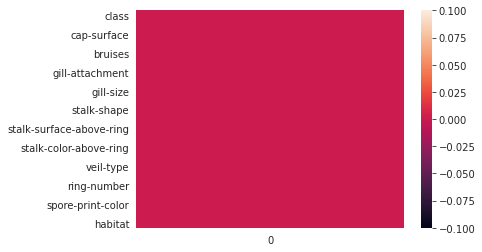

In [8]:
sns.heatmap(df.isnull().sum().to_frame())

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No NULL value in dataset

## **Data Formatting**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All feature is of categorical format

## **Visualization**

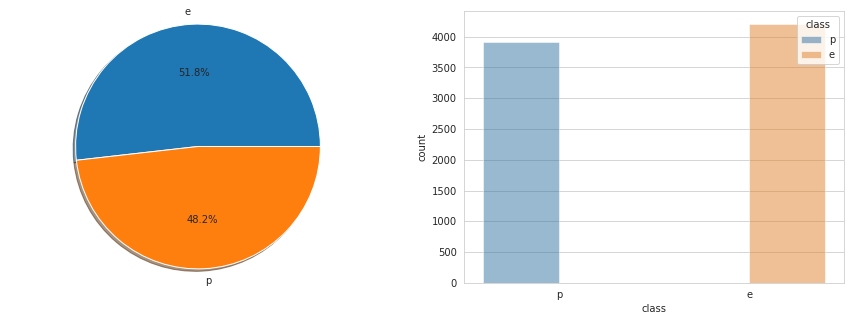

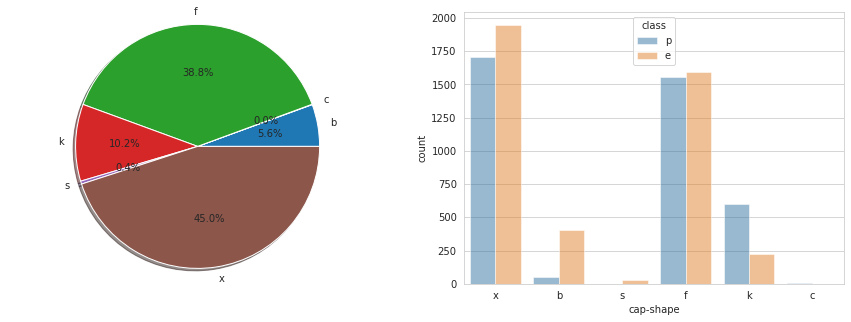

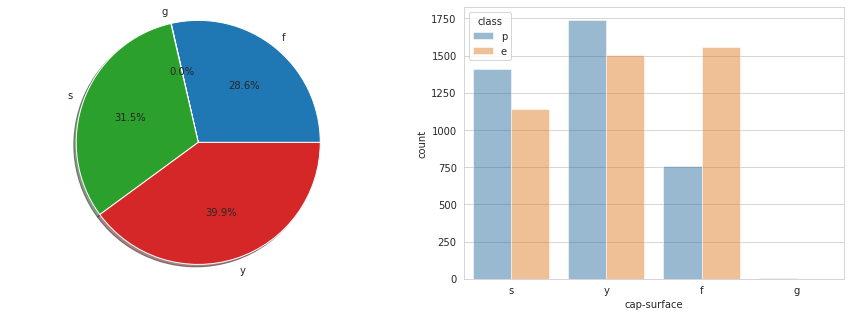

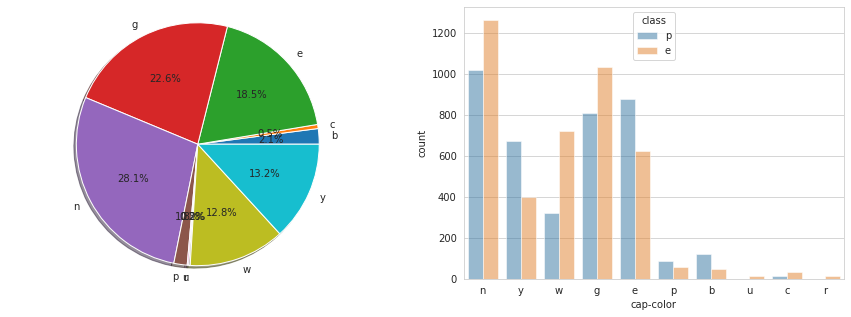

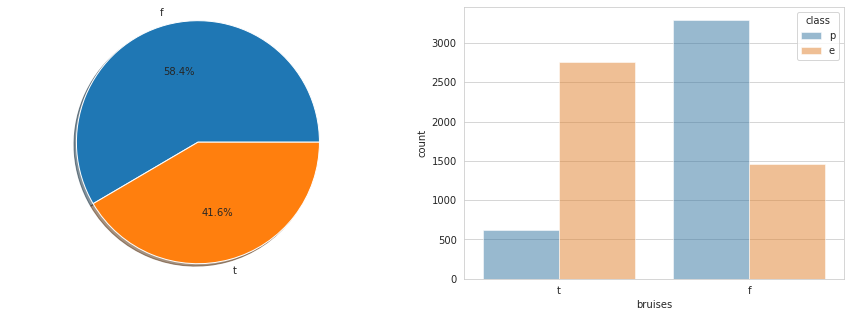

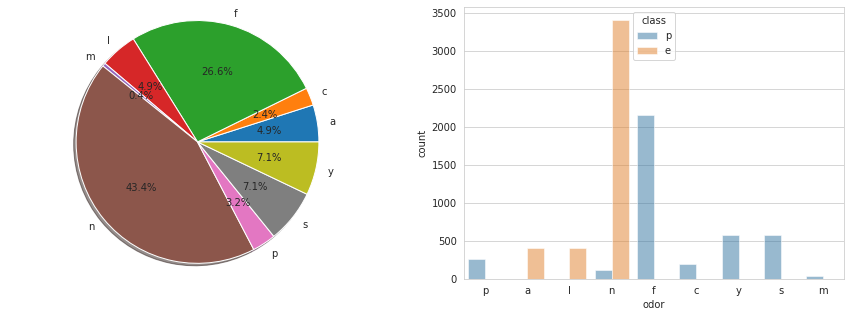

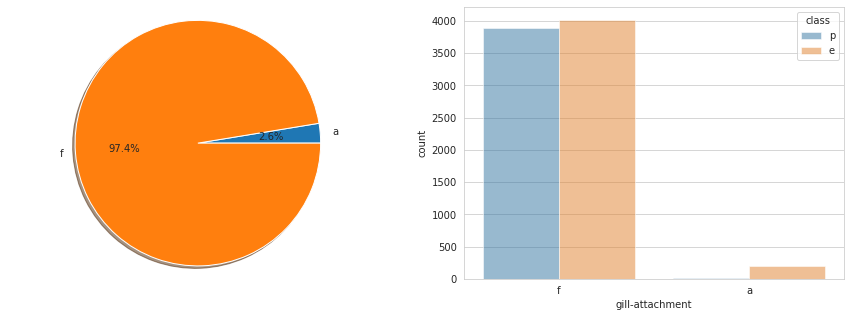

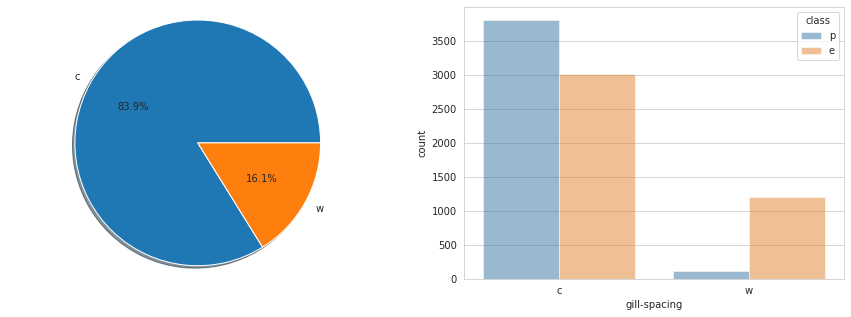

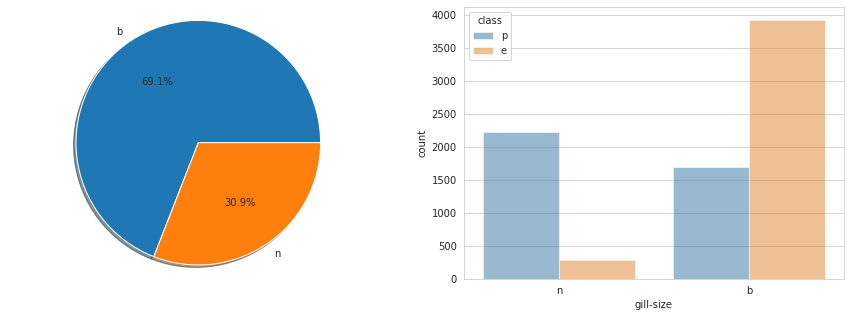

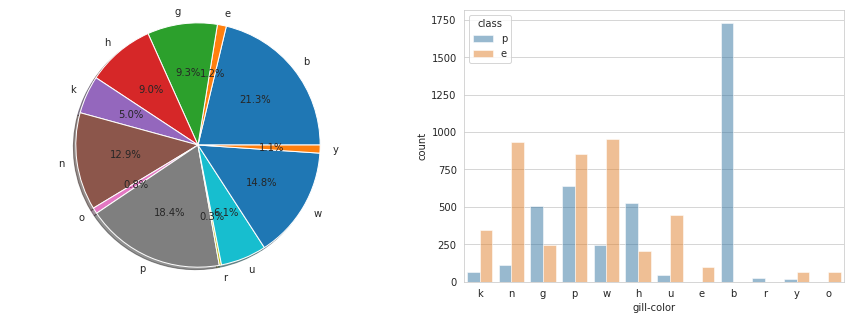

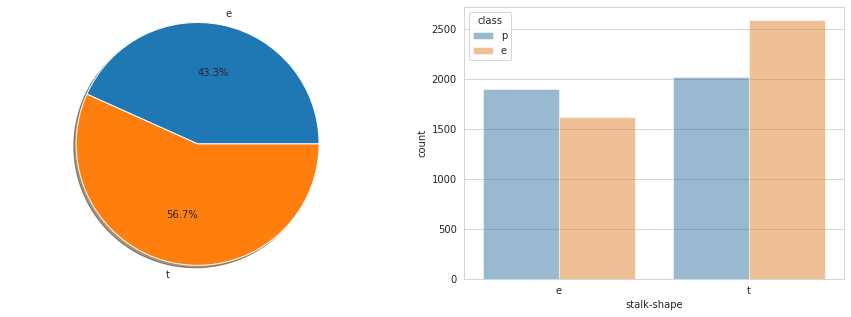

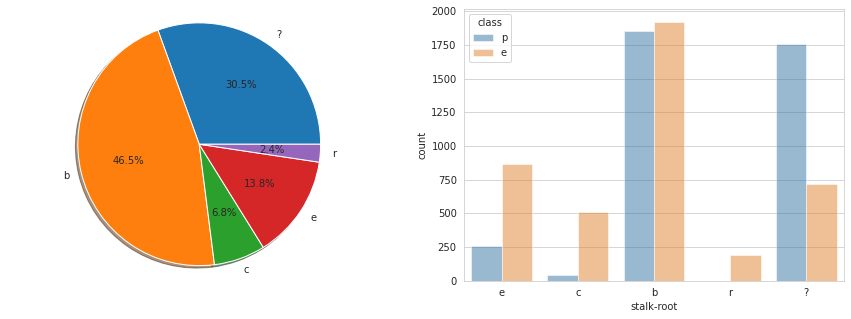

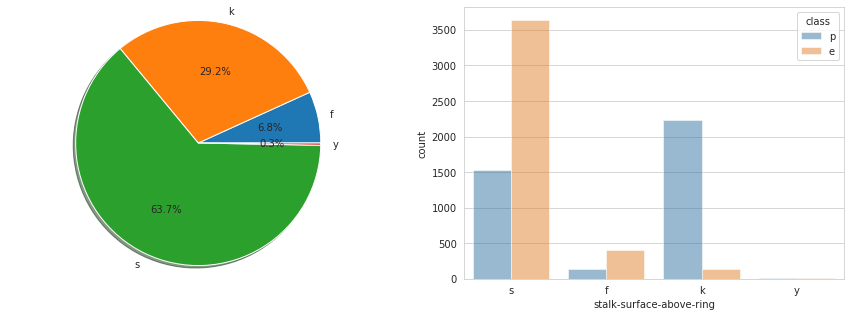

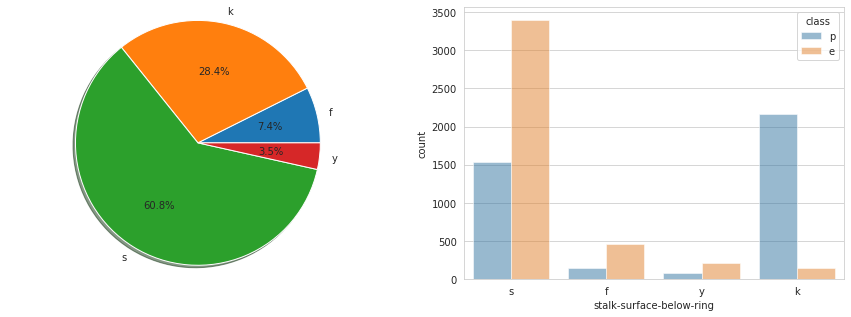

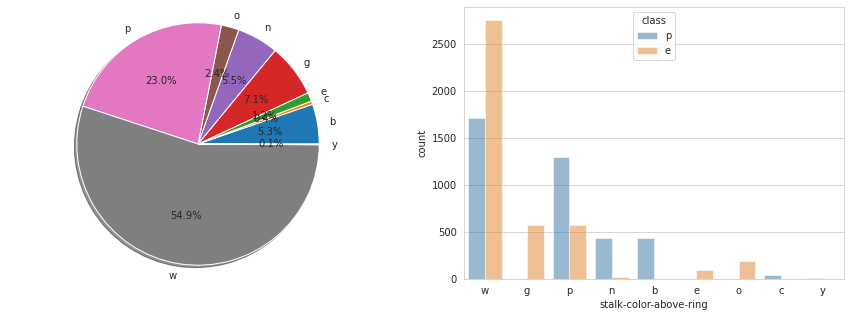

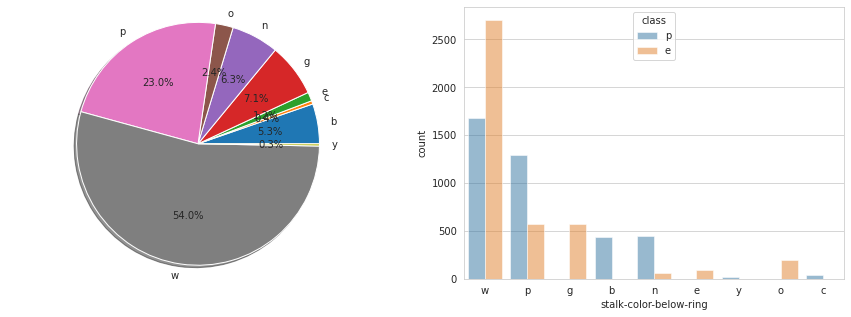

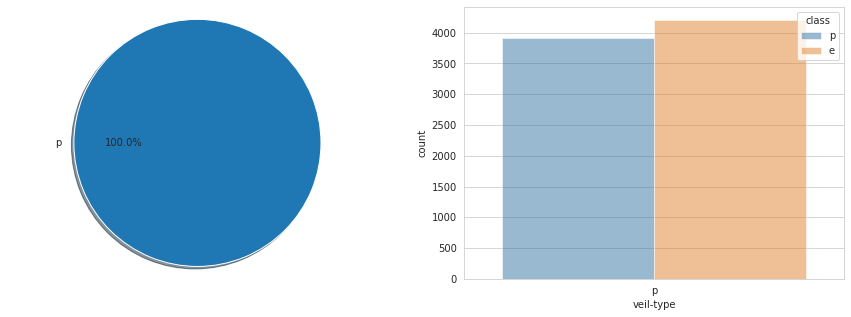

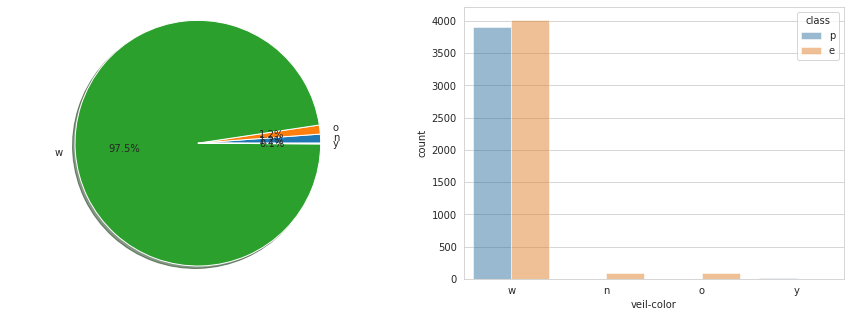

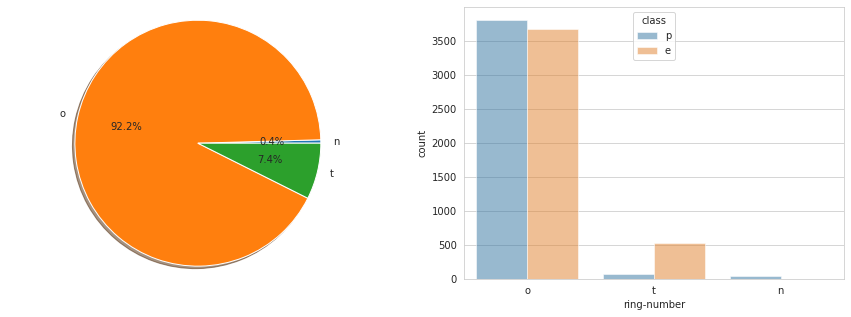

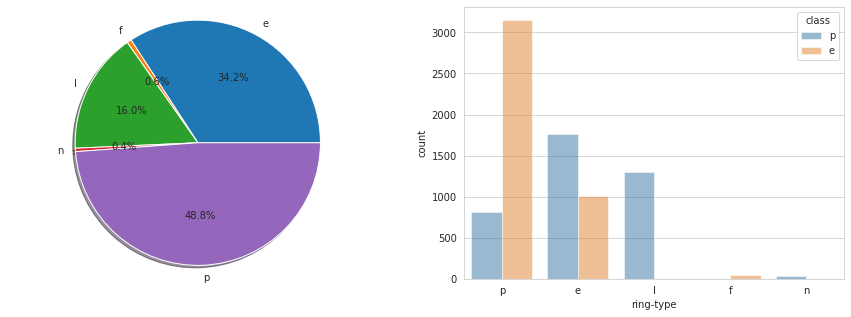

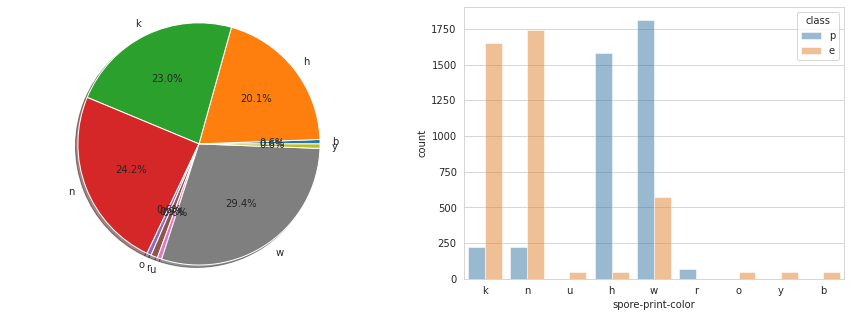

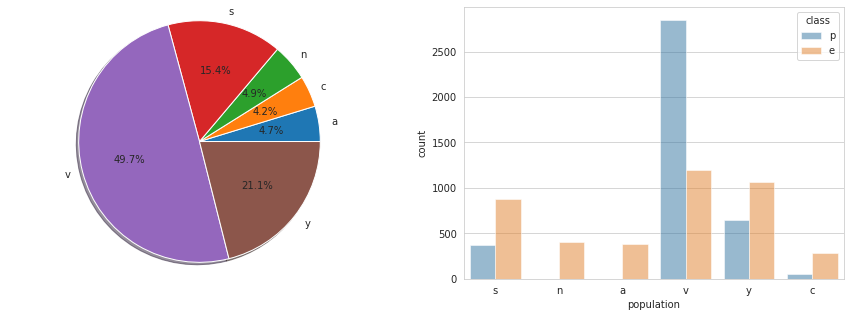

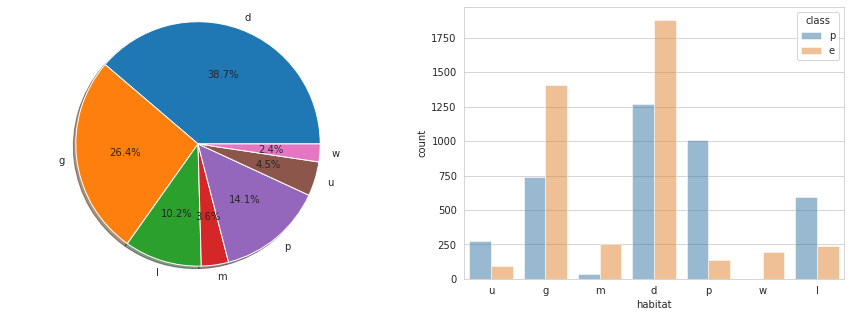

In [11]:

for i in df.columns:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='class',alpha=0.5)
  plt.show()

1- Class data set is balanced. 

2- Vile type has only one category. 

3- Ït can be observed that some categories in the features are more biased towards certain class than others with respect to class. 



Data filtering:-

In [12]:
df.drop('veil-type',axis=1,inplace=True)

In [13]:
x=df.drop('class',axis=1)
y=df['class']

## **Encoding**:- categories are encoded according to the percentage of value represents edible class (percentage encoding)

In [14]:
df_cat=pd.DataFrame(columns=['cat','percent_e','percent_p','count'])
df_e=df.loc[df['class']=='e']
df_p=df.loc[df['class']=='p']
df_encoding=pd.DataFrame(x,copy=True)
for i in x.columns:
  for j in x[i].unique():
    per_e=(df_e[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    per_p=(df_p[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    df_temp=pd.DataFrame([i+'_'+j,per_e,per_p,df[i].loc[df[i]==j].count()]).T
    df_temp.columns=['cat','percent_e','percent_p','count']
    df_cat=pd.concat([df_cat,df_temp],axis=0,ignore_index=True)
    df_encoding[i].loc[df_encoding[i]==j]=per_e
  
    
df_cat['diff']=(df_cat['percent_e']-df_cat['percent_p']).abs()




In [15]:
pd.set_option('display.max_rows',None)

In [16]:
df_cat

,cat,percent_e,percent_p,count,diff
0,cap-shape_x,53.2823,46.7177,3656,6.56455
1,cap-shape_b,89.3805,10.6195,452,78.7611
2,cap-shape_s,100,0,32,100
3,cap-shape_f,50.6345,49.3655,3152,1.26904
4,cap-shape_k,27.5362,72.4638,828,44.9275
5,cap-shape_c,0,100,4,100
6,cap-surface_s,44.7574,55.2426,2556,10.4851
7,cap-surface_y,46.3625,53.6375,3244,7.27497
8,cap-surface_f,67.2414,32.7586,2320,34.4828
9,cap-surface_g,0,100,4,100


In [17]:
df_encoding.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,53.2823,44.7574,55.3415,81.5166,0,50.7455,44.1574,11.465,84.3137,45.9613,77.1429,70.3246,68.8817,61.6487,61.6788,50.6815,49.1453,79.4355,88.0342,70.5128,26.087
1,53.2823,44.7574,37.3134,81.5166,100,50.7455,44.1574,69.8503,84.3137,45.9613,92.0863,70.3246,68.8817,61.6487,61.6788,50.6815,49.1453,79.4355,88.6179,100,65.5493
2,89.3805,44.7574,69.2308,81.5166,100,50.7455,44.1574,69.8503,89.313,45.9613,92.0863,70.3246,68.8817,61.6487,61.6788,50.6815,49.1453,79.4355,88.6179,100,87.6712
3,53.2823,46.3625,69.2308,81.5166,0,50.7455,44.1574,11.465,89.313,45.9613,77.1429,70.3246,68.8817,61.6487,61.6788,50.6815,49.1453,79.4355,88.0342,70.5128,26.087
4,53.2823,44.7574,56.087,30.6655,96.5986,50.7455,91.4634,69.8503,84.3137,56.25,77.1429,70.3246,68.8817,61.6487,61.6788,50.6815,49.1453,36.3112,88.6179,100,65.5493


In [18]:
df_encoding['class']=df['class'].map({'e':1,'p':0})

## **Changing Data type**

In [64]:
df_encoding=df_encoding.astype(float)

In [65]:
x=df_encoding.drop('class',axis=1)
y=df_encoding['class']

In [60]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap-shape                 8124 non-null   float64
 1   cap-surface               8124 non-null   float64
 2   cap-color                 8124 non-null   float64
 3   bruises                   8124 non-null   float64
 4   odor                      8124 non-null   float64
 5   gill-attachment           8124 non-null   float64
 6   gill-spacing              8124 non-null   float64
 7   gill-size                 8124 non-null   float64
 8   gill-color                8124 non-null   float64
 9   stalk-shape               8124 non-null   float64
 10  stalk-root                8124 non-null   float64
 11  stalk-surface-above-ring  8124 non-null   float64
 12  stalk-surface-below-ring  8124 non-null   float64
 13  stalk-color-above-ring    8124 non-null   float64
 14  stalk-co

## **Correlation**

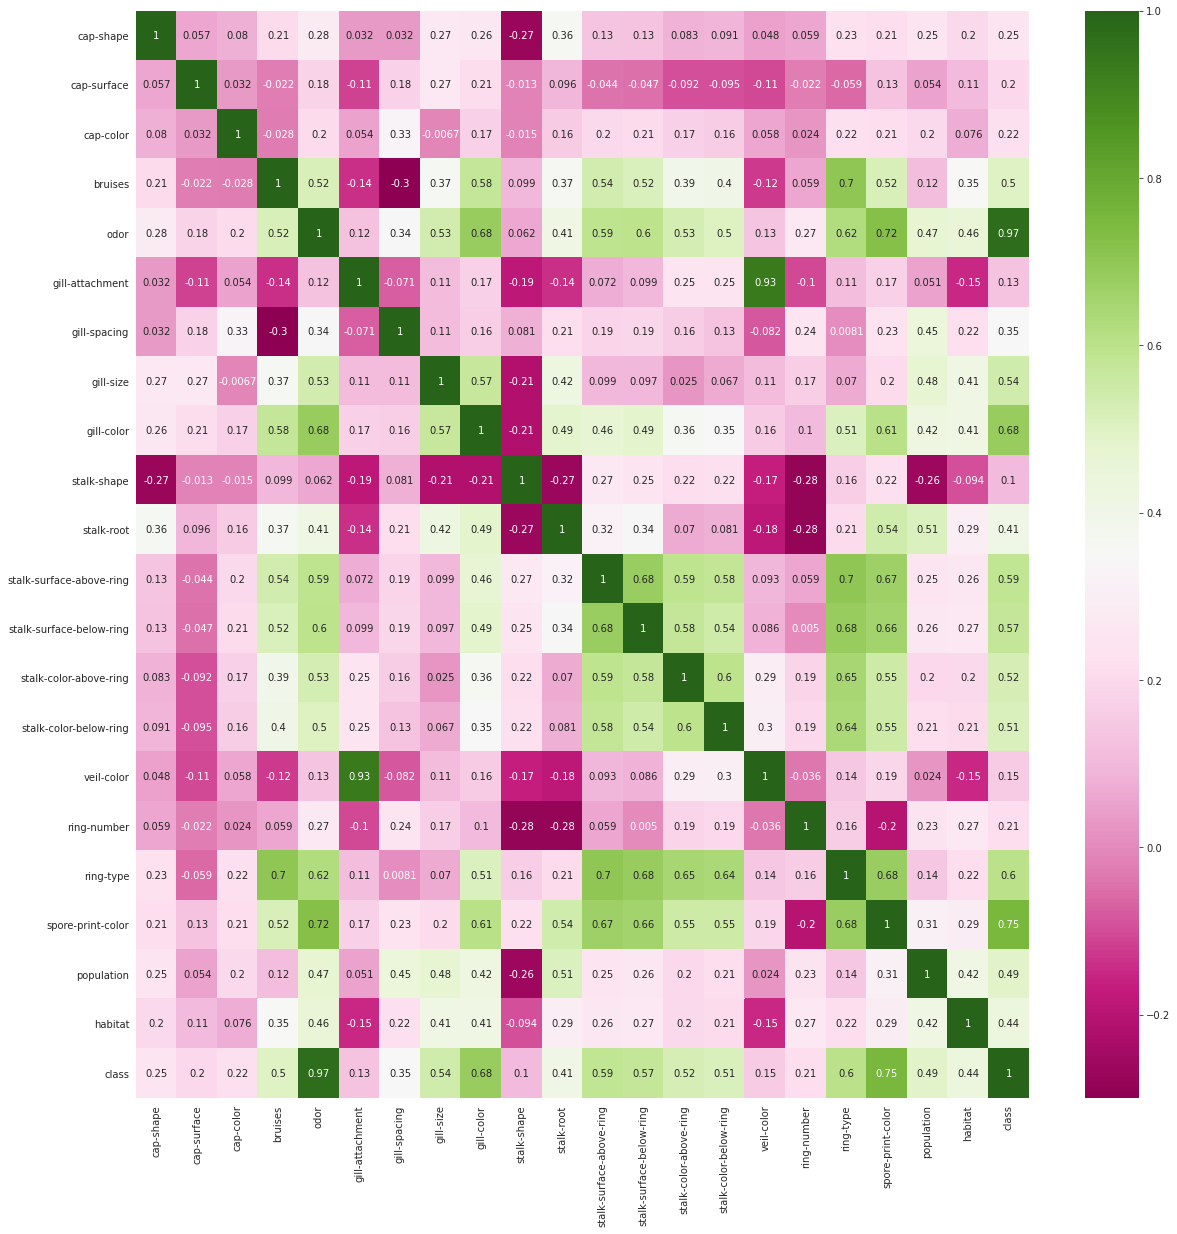

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df_encoding.corr(),annot=True,cmap='PiYG')

## **chi-square test**

In [66]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=21)
s.fit(x,y)

SelectKBest(k=21, score_func=<function chi2 at 0x7fad952fa050>)

In [67]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
stalk-shape,42.419664,7.364588e-11
gill-attachment,109.116608,1.530141e-25
veil-color,216.963309,4.157038e-49
cap-surface,588.900682,4.345367e-130
ring-number,833.212186,3.245752e-183
cap-color,891.385142,7.321453e-196
cap-shape,1424.141393,1.192573e-311
gill-spacing,5768.851718,0.000000e+00
stalk-root,10724.722019,0.000000e+00
habitat,14695.669817,0.000000e+00


 All P value is smaller then 0.05 therefore every feature is related to class. 

## **Separating dependent and independent variables**

In [23]:
x=df_encoding.drop('class',axis=1)
y=df_encoding ['class']

In [24]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

# **Model Evaluation**

## **Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[380   0]
 [  0 433]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       433

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [77]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10)

cv_results['test_score']



array([1.        , 1.        , 1.        , 1.        , 0.99507389,
       0.99630542, 1.        , 1.        , 0.76231527, 1.        ])

## **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC(random_state=42).fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[380   0]
 [  0 433]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       433

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [47]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x, y, cv=10)

cv_results['test_score']


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.98275862, 1.        ])

In [48]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(RFC(), x, y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[3916    0]
 [  20 4188]]
0.9975381585425899
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3916
         1.0       1.00      1.00      1.00      4208

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



## **XGB Classifier**

In [27]:
from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[380   0]
 [  0 433]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       433

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [52]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x, y, cv=10)

cv_results['test_score']




array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95566502, 1.        ])

## **Ada Boost Classifier**

In [53]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[380   0]
 [  0 433]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       433

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [54]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x, y, cv=10)

cv_results['test_score']



array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95073892, 1.        ])

## **Extra Tree Classifier**

In [28]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[380   0]
 [  0 433]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       380
         1.0       1.00      1.00      1.00       433

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [87]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(random_state=123), x, y, cv=5)

cv_results['test_score']


array([1.        , 1.        , 1.        , 1.        , 0.79802956])

# **Hyper-parameter tuning** 

## **Random Forest**

In [78]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in range(200,1000,200)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [96]:

rf_random = GridSearchCV(RFC(), random_grid, scoring='roc_auc',  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 51.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='roc_auc', verbose=1)

In [97]:
print('Best score:', rf_random.best_score_)
print('Best score:', rf_random.best_params_)
print('Best score:', rf_random.best_estimator_)


Best score: 1.0000000000000002
Best score: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best score: RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)


## **XG Boost**

In [91]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xg_grid = GridSearchCV(XBC(n_jobs=-1), params, n_jobs=-1, cv=3, scoring='roc_auc')
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 1.0
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5}
Best score: XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


## **Extra Tree Classifier**

In [94]:
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

et_grid = GridSearchCV(ETC(n_jobs=-1), params, n_jobs=-1, cv=3, scoring='roc_auc')
et_grid.fit(x_train, y_train)

print('Best score:', et_grid.best_score_)
print('Best score:', et_grid.best_params_)
print('Best score:', et_grid.best_estimator_)

Best score: 1.0
Best score: {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: ExtraTreesClassifier(max_leaf_nodes=10, n_jobs=-1)


# **Best Model Evaluation**

In [34]:
model=RFC(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x, y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))


[[3911    5]
 [  73 4135]]
0.9903988183161004
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3916
         1.0       1.00      0.98      0.99      4208

    accuracy                           0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124



In [36]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x, y, cv=10)

cv_results['test_score']

array([1.        , 1.        , 1.        , 1.        , 0.99384236,
       1.        , 1.        , 1.        , 0.90024631, 1.        ])

1.0


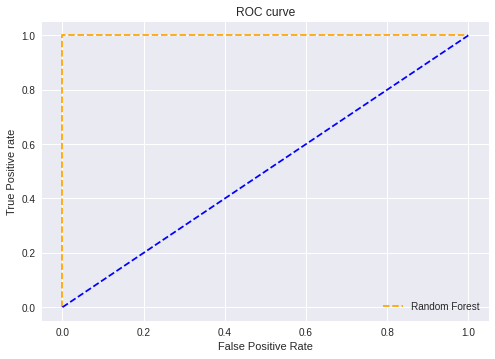

In [38]:
from sklearn.metrics import roc_curve
model.fit(x_train,y_train)
pred_prob1 = model.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# **Saving the model** 

In [55]:
import pickle

filename = '/content/drive/MyDrive/datatrained/mushroom pred/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [56]:

filename = '/content/drive/MyDrive/datatrained/mushroom pred/model.sav'
model = pickle.load(open(filename, 'rb'))

In [58]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, x, y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))

[[3911    5]
 [  92 4116]]
0.9880600689315608
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3916
         1.0       1.00      0.98      0.99      4208

    accuracy                           0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124



In [54]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8084,8085,8086,8087,8088,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108,8109,8110,8111,8112,8113,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
class,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
